In [1]:
import dreye
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get dummy LED measurements and a photoreceptor model

In [2]:
sns.set_theme(
    style='ticks', 
    context='talk',
)

In [3]:
wls = np.arange(300, 651)

In [4]:
np.random.seed(10)
peaks = np.linspace(350, 580, 4)
leds = dreye.create_gaussian_spectrum(
    wls, 
    peaks, 
    np.array([7, 10, 18, 25])
)

In [5]:
intensity_bounds=(
    np.zeros(peaks.size), 
    np.array([10, 12, 17, 22])
)
measured_spectra = dreye.create_measured_spectra_container(
    leds,
    names=['uv', 'blue', 'green', 'amber'], 
    intensity_bounds=intensity_bounds, 
    output_bounds=(0, 5)
)

## Spectra of LEDs used for fitting

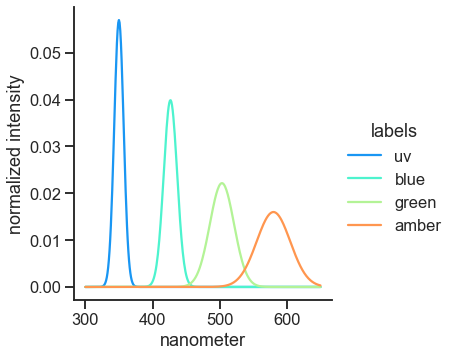

In [6]:
measured_spectra.normalized_spectra.plot(palette='rainbow')
plt.ylabel('normalized intensity')
plt.savefig('selected_LEDs.pdf')

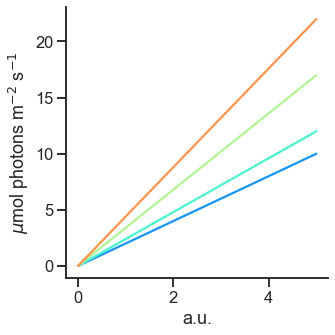

In [7]:
measured_spectra.intensities.plot(palette='rainbow', legend=False)
plt.ylabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.tight_layout()
plt.savefig('selected_light_intensities.pdf')

In [8]:
# intensity range of LEDs
measured_spectra.intensity_bounds

(array([0., 0., 0., 0.]), array([10., 12., 17., 22.]))

## Trichromatic linear photoreceptor model

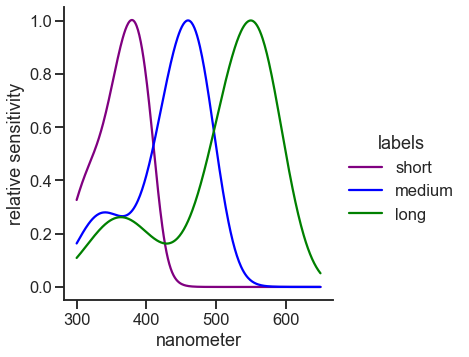

In [9]:
cmap = {'short': 'purple', 'medium': 'blue', 'long': 'green'}
peaks = np.array([380, 460, 550])
photoreceptor_model = dreye.create_photoreceptor_model(np.array([380, 460, 550]), wavelengths=wls, labels=list(cmap))
photoreceptor_model.sensitivity.plot(palette=cmap)

plt.ylabel('relative sensitivity')
plt.savefig('selected_animal.pdf')

In [10]:
measured_spectra.intensity_bounds

(array([0., 0., 0., 0.]), array([10., 12., 17., 22.]))

In [11]:
model = dreye.BestSubstitutionFit(
    photoreceptor_model=photoreceptor_model, 
    measured_spectra=measured_spectra, 
    bg_ints=np.array([2, 3, 1, 1]),
    substitution_type='diff',
    # cp_kwargs={'verbose': True}
)

In [12]:
model.fit(np.array([1, 0, 2]))

BestSubstitutionFit(bg_ints=array([2, 3, 1, 1]),
                    measured_spectra=MeasuredSpectraContainer([[0.0 1.5839807750613167e-12 3.1679615501226334e-12 4.75194232518395e-12] [0.0 4.349866861128161e-12 8.699733722256321e-12 1.304960058338448e-11] [0.0 1.1704122806555761e-11 2.3408245613111522e-11  3.5112368419667285e-11] ... [0.0 0.0 0.0 0.0] [0.0 0.0 0.0 0.0] [0.0 0.0 0.0 0.0]] microspe...526164727143083e-28 3.3052329454286166e-28 4.957849418142925e-28] ... [0.0 0.0029029644764910576 0.005805928952982115 0.008708893429473173] [0.0 0.002601615109536262 0.005203230219072524 0.0078048453286087855] [0.0 0.0023278205606516006 0.004655641121303201 0.0069834616819548015]] microspectral_E_Q),
                    photoreceptor_model=LinearPhotoreceptor('short', 'medium', 'long'))

### Contrast achieved

In [13]:
contrasts = np.round(model.fitted_excite_X_ - model.fitted_other_excite_X_, 2).sum(-1)
contrasts

array([ 4.91,  4.26, 10.44])

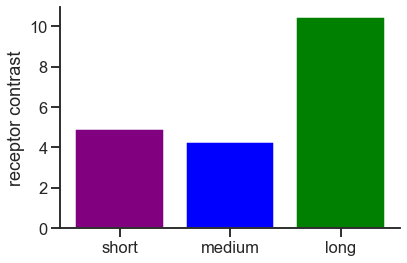

In [14]:
plt.bar(np.arange(3), contrasts, color=cmap.values())
plt.xticks(np.arange(3), cmap)
plt.ylabel('receptor contrast')
sns.despine()
plt.tight_layout()
plt.savefig('contrasts.pdf')

In [15]:
model.fitted_excite_X_

array([[ 2.23431699,  5.5244063 ,  6.60987811],
       [ 4.47783133,  3.07875317,  6.21642838],
       [ 2.18699629,  3.08846334, 11.84766091]])

In [16]:
model.fitted_other_excite_X_

array([[2.234217  , 0.61098948, 6.60977832],
       [0.22080365, 3.07865317, 6.21652838],
       [2.18709629, 3.08836334, 1.40538109]])

### LED intensity differences

In [17]:
np.round(model.fitted_intensities_ - model.fitted_other_intensities_, 4)

array([[ -3.3047,  12.    ,  17.    , -16.9491],
       [ 10.    ,   7.3894, -17.    ,  10.1074],
       [  3.2958, -12.    ,  15.5993,  22.    ]])

In [18]:
model.fitted_intensities_df_

,,,,,,uv,blue,green,amber
fitted_short,fitted_medium,fitted_long,active,direction,substitution_type,,,,
2.234317,5.524406,6.609878,"(medium,)",max,diff,3.007753e+00,1.200000e+01,1.700000e+01,2.618340e+00
4.477831,3.078753,6.216428,"(short,)",max,diff,1.000000e+01,9.640727e+00,3.686530e-09,1.474859e+01
2.186996,3.088463,11.847661,"(long,)",max,diff,6.174505e+00,4.576378e-10,1.651519e+01,2.200000e+01
2.234217,0.610989,6.609778,"(medium,)",min,diff,6.312450e+00,7.198617e-09,8.024058e-09,1.956745e+01
0.220804,3.078653,6.216528,"(short,)",min,diff,7.873581e-10,2.251361e+00,1.700000e+01,4.641166e+00
2.187096,3.088363,1.405381,"(long,)",min,diff,2.878749e+00,1.200000e+01,9.159221e-01,9.363133e-10


### Compare fit to least-squares algorithm

In [19]:
model2 = dreye.IndependentExcitationFit(
    photoreceptor_model=photoreceptor_model, 
    measured_spectra=measured_spectra, 
    bg_ints=np.array([1, 2, 3, 2]),
)

In [20]:
model2.fit(
    model.fitted_excite_X_
)

IndependentExcitationFit(bg_ints=array([1, 2, 3, 2]),
                         measured_spectra=MeasuredSpectraContainer([[0.0 1.5839807750613167e-12 3.1679615501226334e-12 4.75194232518395e-12] [0.0 4.349866861128161e-12 8.699733722256321e-12 1.304960058338448e-11] [0.0 1.1704122806555761e-11 2.3408245613111522e-11  3.5112368419667285e-11] ... [0.0 0.0 0.0 0.0] [0.0 0.0 0.0 0.0] [0.0 0.0 0.0 0.0]] mic...526164727143083e-28 3.3052329454286166e-28 4.957849418142925e-28] ... [0.0 0.0029029644764910576 0.005805928952982115 0.008708893429473173] [0.0 0.002601615109536262 0.005203230219072524 0.0078048453286087855] [0.0 0.0023278205606516006 0.004655641121303201 0.0069834616819548015]] microspectral_E_Q),
                         photoreceptor_model=LinearPhotoreceptor('short', 'medium', 'long'))

In [21]:
np.round(model2.fitted_intensities_, 4)

array([[ 0.1892, 12.    , 17.    , 18.2747],
       [ 6.6249,  1.1478, 14.4377, 18.7186],
       [ 3.0539,  3.3653, 17.    , 22.    ]])

In [22]:
np.round(model.fitted_intensities_, 4)

array([[ 3.0078, 12.    , 17.    ,  2.6183],
       [10.    ,  9.6407,  0.    , 14.7486],
       [ 6.1745,  0.    , 16.5152, 22.    ]])